# Activity: Build a K-means model 

## **Introduction**

K-means clustering is very effective when segmenting data and attempting to find patterns. Because clustering is used in a broad array of industries, becoming proficient in this process will help you expand your skillset in a widely applicable way.   

In this activity, you are a consultant for a scientific organization that works to support and sustain penguin colonies. You are tasked with helping other staff members learn more about penguins in order to achieve this mission. 

The data for this activity is in a spreadsheet that includes datapoints across a sample size of 345 penguins, such as species, island, and sex. Your will use a K-means clustering model to group this data and identify patterns that provide important insights about penguins.

**Note:** Because this lab uses a real dataset, this notebook will first require basic EDA, data cleaning, and other manipulations to prepare the data for modeling. 

## **Step 1: Imports** 


Import statements including `K-means`, `silhouette_score`, and `StandardScaler`.

In [1]:
# Import standard operational packages
import pandas as pd
import numpy as np

# Important tools for modeling and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set()

`Pandas` is used to load the penguins dataset, which is built into the `seaborn` library. The resulting `pandas` DataFrame is saved in a variable named `penguins`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Save the `pandas` DataFrame in variable `penguins`. 

### YOUR CODE HERE ###

penguins = pd.read_csv("penguins.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `load_dataset` function. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

The function is from seaborn (`sns`). It should be passed in the dataset name `'penguins'` as a string. 

</details>

Now, review the first 10 rows of data.


In [3]:
# Display the first 10 rows of the dataset
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` method.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

By default, the method only returns five rows. To change this, specify how many rows `(n = )` you want.

</details>

## **Step 2: Data exploration** 

After loading the dataset, the next step is to prepare the data to be suitable for clustering. This includes: 

*   Exploring data
*   Checking for missing values
*   Encoding data 
*   Dropping a column
*   Scaling the features using `StandardScaler`

### Explore data

To cluster penguins of multiple different species, determine how many different types of penguin species are in the dataset.

In [4]:
# Check the unique values in the 'species' column
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `unique()` method.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `unique()` method on the column `'species'`.

</details>

In [5]:
# Get the count of each penguin species
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `value_counts()` method.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `value_counts()` method on the column `'species'`.

</details>

**Question:** How many types of species are present in the dataset?

[Write your response here. Double-click (or enter) to edit.]

**Question:** Why is it helpful to determine the perfect number of clusters using K-means when you already know how many penguin species the dataset contains?

There are three types of penguin species present in the dataset:

Adelie

Gentoo

Chinstrap

### Check for missing values

An assumption of K-means is that there are no missing values. Check for missing values in the rows of the data. 

In [6]:
# Check for missing values in each column
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `isnull` and `sum` methods. 

</details>

Now, drop the rows with missing values and save the resulting pandas DataFrame in a variable named `penguins_subset`.

In [7]:
# Drop rows with missing values and reset the index
penguins_subset = penguins.dropna().reset_index(drop=True)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `dropna`. Note that an axis parameter passed in to this function should be set to 0 if you want to drop rows containing missing values or 1 if you want to drop columns containing missing values. Optionally, `reset_index` may also be used to avoid a SettingWithCopy warning later in the notebook. 
</details>

Next, check to make sure that `penguins_subset` does not contain any missing values.

In [8]:
# Check for missing values
print(penguins_subset.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


Now, review the first 10 rows of the subset.

In [9]:
# View first 10 rows of the cleaned dataset
penguins_subset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
8,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male
9,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male


### Encode data

Some versions of the penguins dataset have values encoded in the sex column as 'Male' and 'Female' instead of 'MALE' and 'FEMALE'. The code below will make sure all values are ALL CAPS. 


In [10]:
penguins_subset['sex'] = penguins_subset['sex'].str.upper()

K-means needs numeric columns for clustering. Convert the categorical column `'sex'` into numeric. There is no need to convert the `'species'` column because it isn't being used as a feature in the clustering algorithm. 

In [11]:
# Convert 'sex' column to numeric using one-hot encoding
penguins_subset = pd.get_dummies(penguins_subset, columns=['sex'], drop_first=True)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `get_dummies` function. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

The `drop_first` parameter should be set to `True`. This removes redundant data. The `columns` parameter can **optionally** be set to `['sex']` to specify that only the `'sex'` column gets this operation performed on it. 

</details>

### Drop a column

Drop the categorical column `island` from the dataset. While it has value, this notebook is trying to confirm if penguins of the same species exhibit different physical characteristics based on sex. This doesn't include location.

Note that the `'species'` column is not numeric. Don't drop the `'species'` column for now. It could potentially be used to help understand the clusters later. 

In [12]:
# Drop the 'island' column from the dataset
penguins_subset = penguins_subset.drop(columns=['island'])

### Scale the features

Because K-means uses distance between observations as its measure of similarity, it's important to scale the data before modeling. Use a third-party tool, such as scikit-learn's `StandardScaler` function. `StandardScaler` scales each point xᵢ by subtracting the mean observed value for that feature and dividing by the standard deviation:

x-scaled = (xᵢ – mean(X)) / σ

This ensures that all variables have a mean of 0 and variance/standard deviation of 1. 

**Note:** Because the species column isn't a feature, it doesn't need to be scaled. 

First, copy all the features except the `'species'` column to a DataFrame `X`. 

In [13]:
# Exclude the 'species' column from X
X = penguins_subset.drop(columns=['species'])

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use`drop()`.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Select all columns except `'species'.`The `axis` parameter passed in to this method should be set to `1` if you want to drop columns.
</details>

Scale the features in `X` using `StandardScaler`, and assign the scaled data to a new variable `X_scaled`. 

In [14]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Scale the features and assign to X_scaled
X_scaled = scaler.fit_transform(X)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Instantiate StandardScaler to transform the data in a single step.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `.fit_transform()` method and pass in the data as an argument.
</details>

## **Step 3: Data modeling** 

Now, fit K-means and evaluate inertia for different values of k. Because you may not know how many clusters exist in the data, start by fitting K-means and examining the inertia values for different values of k. To do this, write a function called `kmeans_inertia` that takes in `num_clusters` and `x_vals` (`X_scaled`) and returns a list of each k-value's inertia.

When using K-means inside the function, set the `random_state` to `42`. This way, others can reproduce your results.

In [15]:
# Define the kmeans_inertia function
def kmeans_inertia(num_clusters, X_vals):
    inertia_list = []  # To store the inertia values for different k
    for k in range(2, num_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)  # Instantiate KMeans
        kmeans.fit(X_vals)  # Fit the model
        inertia_list.append(kmeans.inertia_)  # Append the inertia value to the list
    return inertia_list

# Return a list of inertia values for k=2 to 10
inertia_values = kmeans_inertia(10, X_scaled)
print(inertia_values)

[885.6224143652249, 578.8284278107235, 386.14534424773285, 284.5464837898288, 217.92858573807678, 201.39287843423264, 186.82270634899209, 173.47283154242746, 164.55854201979943]


Use the `kmeans_inertia` function to return a list of inertia for k=2 to 10.

In [16]:
# Return a list of inertia for k=2 to 10.
inertia_values = kmeans_inertia(10, X_scaled)

# Display the inertia values
print(inertia_values)

[885.6224143652249, 578.8284278107235, 386.14534424773285, 284.5464837898288, 217.92858573807678, 201.39287843423264, 186.82270634899209, 173.47283154242746, 164.55854201979943]


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review the material about the `kmeans_inertia` function. 
</details>

Next, create a line plot that shows the relationship between `num_clusters` and `inertia`.
Use either seaborn or matplotlib to visualize this relationship. 

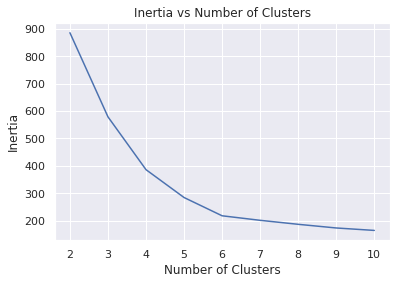

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the number of clusters (k) and corresponding inertia values
inertia_df = pd.DataFrame({
    'num_clusters': range(2, 11),
    'inertia': inertia_values
})

# Create a line plot
sns.lineplot(x='num_clusters', y='inertia', data=inertia_df)

# Customize the plot
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Display the plot
plt.show()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `sns.lineplot`.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Include `x=num_clusters` and `y=inertia`.
</details>

**Question:** Where is the elbow in the plot?

The elbow in the plot occurs at k=6.

Inertia decreases rapidly as the number of clusters increases, but after k=6, the rate of decrease starts to slow down. This is typically the point where adding more clusters no longer significantly improves the model's performance. Therefore, k=6 is often considered the optimal number of clusters for the given data.

## **Step 4: Results and evaluation** 

Now, evaluate the silhouette score using the `silhouette_score()` function. Silhouette scores are used to study the distance between clusters. 

Then, compare the silhouette score of each value of k, from 2 through 10. To do this, write a function called `kmeans_sil` that takes in `num_clusters` and `x_vals` (`X_scaled`) and returns a list of each k-value's silhouette score.

In [18]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Define a function to calculate silhouette scores for different k values
def kmeans_sil(num_clusters, X_scaled):
    silhouette_scores = []
    for k in range(2, num_clusters + 1):  # Loop from k=2 to num_clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)
    return silhouette_scores

# Get silhouette scores for k=2 to k=10
sil_scores = kmeans_sil(10, X_scaled)

# Print the silhouette scores for each k
print(sil_scores)

[0.44398088353055243, 0.45101024097188364, 0.5080140996630784, 0.519998574860868, 0.5263224884981607, 0.47774022332151733, 0.42680523270292947, 0.35977478703657334, 0.3589883410610364]


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review the `kmeans_sil` function video.
</details>

Next, create a line plot that shows the relationship between `num_clusters` and `sil_score`.
Use either seaborn or matplotlib to visualize this relationship. 

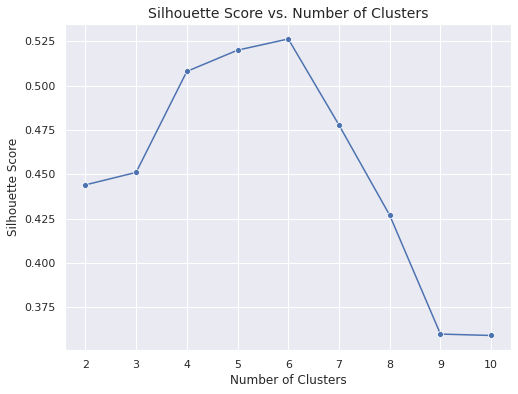

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for easier plotting
num_clusters = list(range(2, 11))  # k values from 2 to 10
sil_score = kmeans_sil(10, X_scaled)  # Get the silhouette scores

# Create a DataFrame with num_clusters and corresponding silhouette scores
silhouette_df = pd.DataFrame({
    'num_clusters': num_clusters,
    'sil_score': sil_score
})

# Plot the relationship between num_clusters and silhouette score
plt.figure(figsize=(8, 6))
sns.lineplot(x='num_clusters', y='sil_score', data=silhouette_df, marker='o', color='b')

# Add labels and title
plt.title('Silhouette Score vs. Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt.show()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `sns.lineplot`.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Include `x=num_clusters` and `y=sil_score`.
</details>

**Question:** What does the graph show?

Silhouette Score: This is a metric used to evaluate how well-separated the clusters are. A higher silhouette score indicates that the clusters are well-defined and distinct from each other, while a lower score suggests that the clusters may overlap or be poorly separated.

Interpretation of the Graph:

If the graph shows a higher silhouette score for a particular value of k, it means that the clustering configuration with that number of clusters is the most optimal in terms of how well-separated the clusters are.

If the silhouette score drops for certain values of k, this indicates that the clustering becomes less distinct and may not represent the data well.

Key Points to Observe:
Optimal k: The value of k that gives the highest silhouette score is generally considered the best number of clusters for the data, as it means the data points are well-clustered and distinct.

Sudden Drop or Fluctuations: If the graph shows significant drops or fluctuations in silhouette score as k increases, it suggests that increasing the number of clusters beyond a certain point might not improve the clustering quality, or it could even worsen it.

Conclusion:
The graph helps identify the optimal number of clusters by showing the relationship between the number of clusters and the silhouette score. The point with the highest silhouette score suggests the best clustering solution for the dataset.

### Optimal k-value

To decide on an optimal k-value, fit a six-cluster model to the dataset. 

In [20]:
# Import the necessary library
from sklearn.cluster import KMeans

# Fit a 6-cluster model
kmeans_6 = KMeans(n_clusters=6, random_state=42)
kmeans_6.fit(X_scaled)  # Fit the model to the scaled data

# Check the cluster centers
print(kmeans_6.cluster_centers_)  # Displaying the coordinates of the cluster centers

[[-0.68814491  0.95407755 -0.6175924  -0.20804366  0.99103121]
 [ 0.28770523 -1.48856681  0.83888369  0.58791154 -1.00904996]
 [-1.1742663   0.20891069 -0.95038091 -1.04963915 -1.00904996]
 [ 1.00375917 -0.73582333  1.47012866  1.58926579  0.99103121]
 [ 1.2476557   1.08870282 -0.09291374 -0.31712919  0.99103121]
 [ 0.60756008  0.27566403 -0.58653229 -0.79256819 -1.00904996]]


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Make an instance of the model with `num_clusters = 6` and use the `fit` function on `X_scaled`. 
</details>




Print out the unique labels of the fit model.

In [21]:
# Print unique labels (clusters)
unique_labels = np.unique(kmeans_6.labels_)  # Get the unique labels from the fitted model
print(unique_labels)  # Display the unique cluster labels

[0 1 2 3 4 5]


Now, create a new column `cluster` that indicates cluster assignment in the DataFrame `penguins_subset`. It's important to understand the meaning of each cluster's labels, then decide whether the clustering makes sense. 

**Note:** This task is done using `penguins_subset` because it is often easier to interpret unscaled data.

In [22]:
# Assign the cluster labels to the 'cluster' column in the penguins_subset DataFrame
penguins_subset['cluster'] = kmeans_6.labels_

# Display the first few rows to check the cluster assignments
penguins_subset.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,Adelie,39.1,18.7,181.0,3750.0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,0,2
2,Adelie,40.3,18.0,195.0,3250.0,0,2
3,Adelie,36.7,19.3,193.0,3450.0,0,2
4,Adelie,39.3,20.6,190.0,3650.0,1,0


Use `groupby` to verify if any `'cluster'` can be differentiated by `'species'`.

In [23]:
# Group by 'cluster' and 'species' and count the occurrences
cluster_species_group = penguins_subset.groupby(by=['cluster', 'species']).size().reset_index(name='count')

# Display the result
print(cluster_species_group)

   cluster    species  count
0        0     Adelie     71
1        1     Gentoo     58
2        2     Adelie     73
3        2  Chinstrap      5
4        3     Gentoo     61
5        4     Adelie      2
6        4  Chinstrap     34
7        5  Chinstrap     29


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `groupby(by=['cluster', 'species'])`. 

</details>


<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>


Use an aggregation function such as `size`.

</details>

Next, interpret the groupby outputs. Although the results of the groupby show that each `'cluster'` can be differentiated by `'species'`, it is useful to visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'`. 

**Note:** The code for the graph below is outside the scope of this lab. 

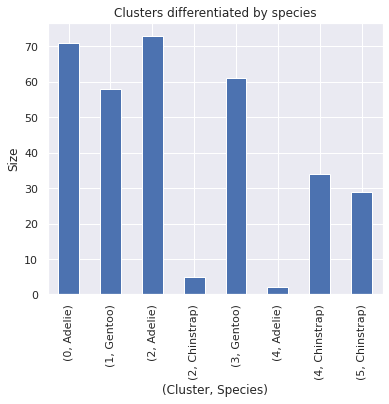

In [24]:
penguins_subset.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Species)');

Use `groupby` to verify if each `'cluster'` can be differentiated by `'species'` AND `'sex_MALE'`.

In [25]:
# Group by 'cluster', 'species', and 'sex_MALE' and count the occurrences
cluster_species_sex_group = penguins_subset.groupby(by=['cluster', 'species', 'sex_MALE']).size().reset_index(name='count')

# Display the result
print(cluster_species_sex_group)

   cluster    species  sex_MALE  count
0        0     Adelie         1     71
1        1     Gentoo         0     58
2        2     Adelie         0     73
3        2  Chinstrap         0      5
4        3     Gentoo         1     61
5        4     Adelie         1      2
6        4  Chinstrap         1     34
7        5  Chinstrap         0     29


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `groupby(by=['cluster','species', 'sex_MALE'])`. 
</details>


<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use an aggregation function such as `size`.
</details>

**Question:** Are the clusters differentiated by `'species'` and `'sex_MALE'`?

Yes, the clusters are differentiated by both species and sex_MALE.

From the grouped data, we can observe the following:

Cluster 0 contains a majority of male Adelie penguins (71).

Cluster 1 contains Gentoo penguins that are female (58).

Cluster 2 is mostly composed of female Adelie penguins (73), with a few Chinstrap penguins (5).

Cluster 3 contains mostly male Gentoo penguins (61).

Cluster 4 is a smaller cluster that contains a few male Adelie penguins (2) and more female Chinstrap penguins (34).

Cluster 5 contains mostly female Chinstrap penguins (29).

So, yes, the clusters seem to be influenced by both species and sex, with certain clusters being dominated by specific species and/or sex groups.

Finally, interpret the groupby outputs and visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'` and `'sex_MALE'`. Furthermore, each cluster is mostly comprised of one sex and one species. 

**Note:** The code for the graph below is outside the scope of this lab. 

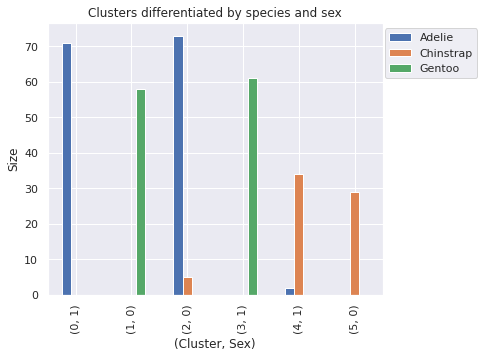

In [26]:
penguins_subset.groupby(by=['cluster','species','sex_MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))

## **Considerations**


**What are some key takeaways that you learned during this lab? Consider the process you used, key tools, and the results of your investigation.**

Data Preprocessing: The importance of properly cleaning and preparing data for clustering was highlighted. This includes handling missing values, encoding categorical variables, and scaling features. I used tools like dropna() for missing values, StandardScaler() for scaling, and get_dummies() for encoding the sex column.

Feature Engineering: Some columns were dropped, like island, to focus on more relevant features for clustering, such as species and sex. This made the modeling more focused on physical traits rather than external factors like location.

K-means Clustering: The process of selecting an optimal number of clusters was key. I used the elbow method to evaluate inertia for different values of k and the silhouette score to assess how well-separated the clusters were. Both methods helped in deciding that 6 clusters was optimal for this data.

Cluster Interpretation: After fitting the K-means model, I evaluated the clusters and used groupings like species and sex_MALE to verify how meaningful the clusters were. The analysis showed that the clusters were meaningfully differentiated by both species and sex, which makes sense for a dataset involving penguins, where physical characteristics differ across species and sex.

**What summary would you provide to stakeholders?**

Clustering Objective: Our goal was to understand the different segments within a penguin population based on physical characteristics, such as bill length, flipper length, and body mass. This segmentation could provide insights that inform conservation efforts.

Data Preparation: We cleaned the data by removing missing values and encoding categorical columns. The data was then scaled to ensure that the clustering algorithm performed effectively, as K-means relies on distance metrics.

Clustering Results: After evaluating different numbers of clusters using the elbow method and silhouette scores, we found that a 6-cluster solution was optimal. These clusters showed distinct patterns based on species and sex, which suggests that these variables play a significant role in differentiating penguin populations in this dataset.

Insights: The clusters revealed that certain species (e.g., Adelie, Gentoo, and Chinstrap) exhibit distinct physical characteristics, and sex also influences these traits. For example, some clusters were mostly male or female, while others were species-specific.

Next Steps: These insights can guide further analysis and help in targeted conservation efforts. Additionally, understanding these clusters can aid in identifying trends or anomalies in penguin populations across different regions or over time.

### References

[Gorman, Kristen B., et al. “Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis).” PLOS ONE, vol. 9, no. 3, Mar. 2014, p. e90081. PLoS Journals](https://doi.org/10.1371/journal.pone.0090081)

[Sklearn Preprocessing StandardScaler scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)